In [95]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [96]:
data = pd.read_csv('traindataset.csv',memory_map=True) #importing cleaned dataset

In [97]:
categorical_cols = ["Housing Situation","Satisfation with employer",
                    "Gender","Country","Profession","University Degree","Hair Color"]
conti_cols = ["Year of Record","Crime Level in the City of Employement",
              "Work Experience in Current Job [years]","Age","Size of City","Wears Glasses",
              "Body Height [cm]","Yearly Income in addition to Salary (e.g. Rental Income)"]

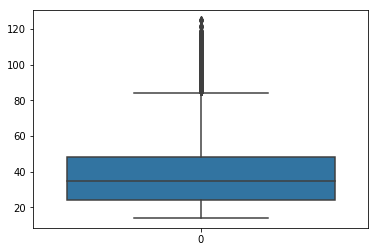

In [98]:
#https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623
#Plotting box plot to look for outliers in each continuous column
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=data['Age'])
plt.show()

In [99]:
#this function takes a string column name and returns a list
#containing indices of dataframe that have outliers in that column
#Refer: https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623
def OutlierByColumn(colname):
    rows = data.shape[0]
    col_std = np.std(data[colname])
    col_mean = np.mean(data[colname])
    anomaly_cut_off = col_std * 3
    lower_limit  = col_mean - anomaly_cut_off 
    upper_limit = col_mean + anomaly_cut_off
    anomalies_indices = []
    for i in range(rows):
        ele = data[colname][i]
        if ele > upper_limit or ele < lower_limit:
            anomalies_indices.append(i)
    return anomalies_indices        

In [100]:
data.shape #checking no of rows and no of columns for reference

(991712, 18)

In [101]:
#getting indices of outliers for continuous labels
#This will take some time to execute
arr1 = OutlierByColumn('Work Experience in Current Job [years]')
arr2 = OutlierByColumn('Age')
arr3 = OutlierByColumn('Body Height [cm]')
arr4 = OutlierByColumn('Yearly Income in addition to Salary (e.g. Rental Income)')
arr5 = OutlierByColumn('Size of City')

In [102]:
#Union of all lists 
union_index = np.union1d(arr1,arr2)
union_index = np.union1d(union_index,arr3)
union_index = np.union1d(union_index,arr4)
union_index = np.union1d(union_index,arr5)
len(union_index)

50483

In [103]:
data = data.drop(union_index) #removing all columns containing one or more outliers

In [104]:
#Read somewhere that binary encoders take less space
import category_encoders as ce
encoder = ce.BinaryEncoder(categorical_cols) 

In [105]:
#encoding categorical columns
encoded = encoder.fit_transform(data[categorical_cols])

In [106]:
#joining encoded columns with continous columns
encoded = encoded.join(data[conti_cols])

In [107]:
x = encoded.values 

In [108]:
y = data['Total Yearly Income [EUR]'].values 

In [109]:
#checking how linear regression performs
from sklearn import linear_model
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = linear_model.LinearRegression()
regressor.fit(xtrain,ytrain)
ypred = regressor.predict(xtest)
np.sqrt(metrics.mean_squared_error(ytest, ypred))#Root Mean Squared Error

75400.6946599875

In [110]:
#GradientBoostingRegressor
#This will take some time to execute 
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xtrain,ytrain)
ypred = gbr.predict(xtest)
np.sqrt(metrics.mean_squared_error(ytest, ypred))#Root Mean Squared Error

55745.56714694027